In [19]:
from Codigo import *
from statsmodels.tsa.vector_ar.vecm import VECM
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [23]:
Datos = Tachos('../Alemania_Reducida.csv')

In [21]:
Columnas(Datos, 'Consumo')

Consumo de energía procedente de combustibles fósiles (% del total)
Consumo medio o ingresos per cápita según encuestas, 40 % más pobre de la población (USD por día según la PPA de 2011)
Consumo de energía eléctrica (kWh per cápita)
Consumo de energía renovable (% del consumo total de energía final)
Consumo de fertilizantes (kilogramos por hectárea de tierras cultivables)
Consumo de alcohol total per cápita (litros de alcohol puro, estimaciones previstas, mayores de 15 años)
Consumo de sal iodada (% de hogares)
Consumo de fertilizantes (% de producción de fertilizantes)
Consumo medio o ingresos per cápita según encuestas, población total (USD por día según la PPA de 2011)


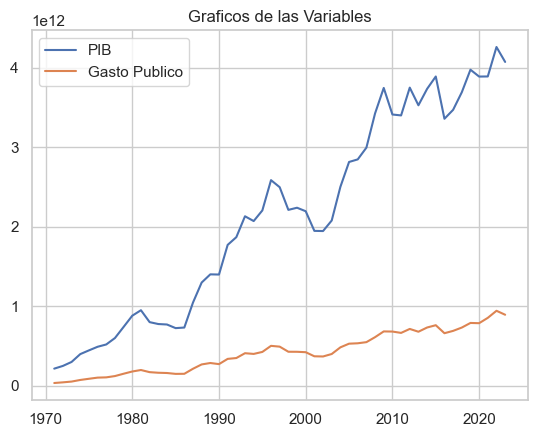

In [26]:
dt = Datos[['PIB (US$ a precios actuales)','Gasto de consumo final del gobierno general (US$ a precios actuales)']].dropna(axis = 0)
dt.columns = ['PIB', 'Gasto Publico']
plt.title('Graficos de las Variables')
plt.plot(dt, label = dt.columns)
plt.legend()
plt.show()

In [37]:
print(dt.head())

                     PIB  Gasto Publico
fecha                                  
1970-12-31  2.158384e+11   3.508178e+10
1971-12-31  2.499851e+11   4.337949e+10
1972-12-30  2.998015e+11   5.309152e+10
1973-12-31  3.983740e+11   7.327311e+10
1974-12-31  4.453035e+11   8.826537e+10


In [35]:
resultado = VECM(dt,).fit()
print(resultado.summary())

 Det. terms outside the coint. relation & lagged endog. parameters for equation PIB 
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.PIB              -0.0877      0.395     -0.222      0.824      -0.862       0.687
L1.Gasto Publico     0.7095      1.978      0.359      0.720      -3.166       4.585
Det. terms outside the coint. relation & lagged endog. parameters for equation Gasto Publico
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
L1.PIB              -0.0575      0.075     -0.765      0.444      -0.205       0.090
L1.Gasto Publico     0.3617      0.376      0.962      0.336      -0.375       1.099
                Loading coefficients (alpha) for equation PIB                 
                 coef    std err          z      P>|z|      [0.

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


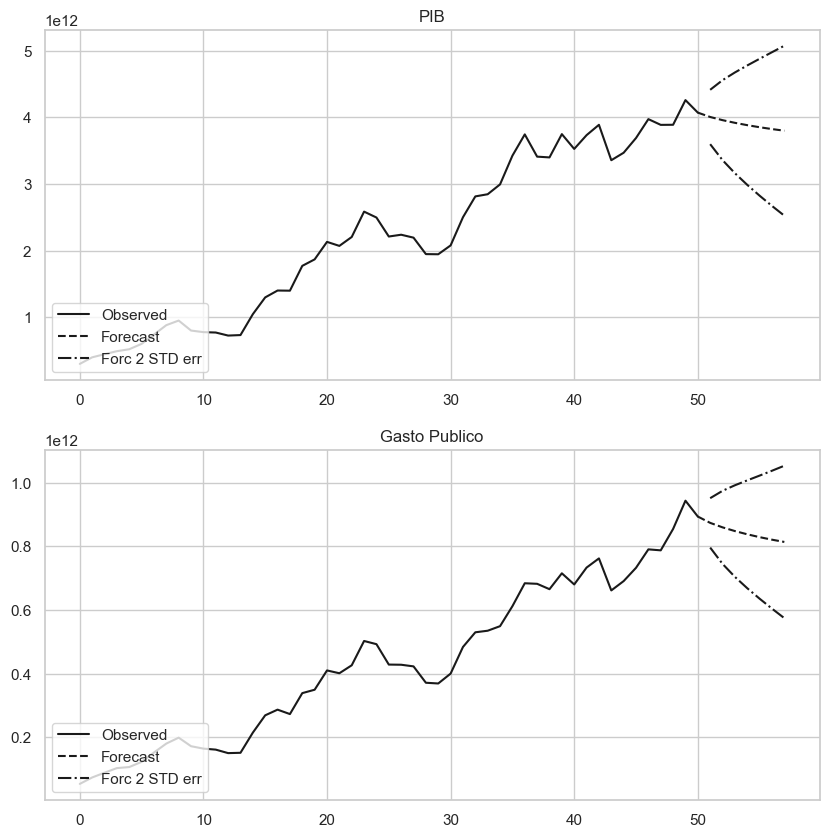

In [38]:
resultado.plot_forecast(steps = 7)
plt.show()